#                                             AVOCADO PRICE ANALYSIS(Regression)

1. Intoduction
2. Data Preprocessing
3. Data Vizualization
4. EDA
5. Model Testing
6. Ensemble Tecniques
7. GridsearchCv
8. Cross Validation
9. Best Model
10. Test & Predictions Plot
11. Saving the best Model

# Introduction

# Data Preprocessing

In [1]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Loading Data
df=pd.read_csv('avocado.csv')
df

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0.0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015.0,Albany
1,1.0,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015.0,Albany
2,2.0,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015.0,Albany
3,3.0,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015.0,Albany
4,4.0,29-11-2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015.0,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16463,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16464,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16465,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16466,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
# As we can see above data set contains so many nan rows...checking for null values
df.isnull().sum()

Unnamed: 0      14951
Date            14951
AveragePrice    14951
Total Volume    14951
4046            14951
4225            14951
4770            14951
Total Bags      14951
Small Bags      14951
Large Bags      14951
XLarge Bags     14951
type            14951
year            14951
region          14951
dtype: int64

In [4]:
#Dropping all the rows containing null values
df=df.dropna() 
df = df.reset_index(drop = True) 

In [5]:
df

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0.0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.00,conventional,2015.0,Albany
1,1.0,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.00,conventional,2015.0,Albany
2,2.0,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.00,conventional,2015.0,Albany
3,3.0,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.00,conventional,2015.0,Albany
4,4.0,29-11-2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.00,conventional,2015.0,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1512,10.0,16-10-2016,1.39,190846.01,57529.11,56366.66,17531.78,59418.46,48823.53,10354.65,240.28,conventional,2016.0,Charlotte
1513,11.0,09-10-2016,1.51,178235.75,43325.87,52189.61,19419.57,63300.70,54704.14,8596.56,0.00,conventional,2016.0,Charlotte
1514,12.0,02-10-2016,1.48,178410.82,46364.75,52893.38,16736.92,62415.77,53332.61,8258.16,825.00,conventional,2016.0,Charlotte
1515,13.0,25-09-2016,1.47,189131.52,54110.79,53593.58,17495.42,63931.73,55653.47,8278.26,0.00,conventional,2016.0,Charlotte


In [6]:
# checking the datatypes
df.dtypes

Unnamed: 0      float64
Date             object
AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type             object
year            float64
region           object
dtype: object

In [7]:
# Making date to datetime 
df['Date'] = pd.to_datetime(df['Date'])

In [8]:
# convert year colum from float to int
df['year']=df['year'] .astype(int)

In [9]:
df['type'].value_counts()

conventional    1517
Name: type, dtype: int64

In [10]:
df['region'].value_counts()

California             76
Albany                 67
Boise                  65
BaltimoreWashington    65
Boston                 62
Atlanta                54
PhoenixTucson          52
BuffaloRochester       51
Spokane                49
Columbus               47
NewYork                44
Jacksonville           41
Detroit                40
SouthCentral           39
SanDiego               38
West                   36
Tampa                  34
Louisville             34
Charlotte              31
Portland               30
NorthernNewEngland     29
Houston                29
WestTexNewMexico       27
Nashville              25
TotalUS                25
Denver                 24
SouthCarolina          24
GrandRapids            23
Chicago                23
Pittsburgh             22
RichmondNorfolk        21
Orlando                21
Syracuse               19
HarrisburgScranton     19
GreatLakes             18
Midsouth               18
DallasFtWorth          17
MiamiFtLauderdale      17
Roanoke     

In [11]:
# dropping unamed column as this has index only and we have index in our dataframe
df.drop('Unnamed: 0',axis=1,inplace=True)
# dropping the type column asit contains same value which will not affect our dataset
df.drop('type',axis=1,inplace=True)

In [12]:
#sorting dataset as per Date Column
df=df.sort_values('Date')
df

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,region
1265,2015-01-02,0.71,916367.42,611270.39,205181.23,14107.36,85808.44,82065.70,3742.74,0.00,2015,WestTexNewMexico
1111,2015-01-02,0.97,135656.36,35897.25,84741.31,2704.69,12313.11,12276.59,36.52,0.00,2015,Spokane
1011,2015-01-02,0.91,469684.32,284674.20,78055.21,27248.16,79706.75,51793.30,27913.45,0.00,2015,SouthCarolina
488,2015-01-02,0.92,245352.56,7245.61,181784.28,14761.53,41561.14,20669.59,18130.75,2760.80,2015,Indianapolis
755,2015-01-02,1.14,569304.80,30263.22,417993.89,1722.10,119325.59,104365.66,14959.93,0.00,2015,Philadelphia
...,...,...,...,...,...,...,...,...,...,...,...,...
1324,2016-12-25,1.03,71168.92,27464.22,2892.64,6681.19,34130.87,33449.40,662.22,19.25,2016,Boise
1502,2016-12-25,1.25,155793.03,36125.58,50792.48,7324.64,61550.33,51247.91,10232.98,69.44,2016,Charlotte
1450,2016-12-25,0.94,5414937.46,1579234.89,2192460.84,99997.75,1543243.98,1405419.80,99069.58,38754.60,2016,California
1408,2016-12-25,1.41,103035.45,1197.33,64434.59,42.09,37361.44,35701.24,1660.20,0.00,2016,BuffaloRochester


In [13]:
# checking again for null values if any left as we have already dropped the rows containg null values
df.isnull().sum()

Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
year            0
region          0
dtype: int64

In [14]:
df.describe()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,1517.000000,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1517.000000,1517.000000
mean,1.074990,1.601879e+06,6.464387e+05,6.114375e+05,5.040550e+04,2.935974e+05,2.487736e+05,4.264205e+04,2181.771074,2015.162821
std,0.188891,4.433143e+06,1.947614e+06,1.672906e+06,1.377812e+05,7.579765e+05,6.474765e+05,1.182157e+05,7455.712144,0.369324
min,0.490000,3.875074e+04,4.677200e+02,1.783770e+03,0.000000e+00,3.311770e+03,3.311770e+03,0.000000e+00,0.000000,2015.000000
25%,0.980000,1.474700e+05,2.040034e+04,4.147606e+04,9.112500e+02,3.620689e+04,2.972722e+04,5.407400e+02,0.000000,2015.000000
50%,1.080000,4.027919e+05,8.175117e+04,1.186649e+05,7.688170e+03,7.397906e+04,6.237569e+04,5.044350e+03,0.000000,2015.000000
75%,1.190000,9.819751e+05,3.775785e+05,4.851503e+05,2.916730e+04,1.576097e+05,1.461994e+05,2.926767e+04,401.480000,2015.000000
max,1.680000,4.465546e+07,1.893304e+07,1.895648e+07,1.381516e+06,6.736304e+06,5.893642e+06,1.121076e+06,108072.790000,2016.000000


# Data Vizualization

univariate graph

(array([ 0., 10., 20., 30., 40., 50., 60., 70., 80.]),
 <a list of 9 Text major ticklabel objects>)

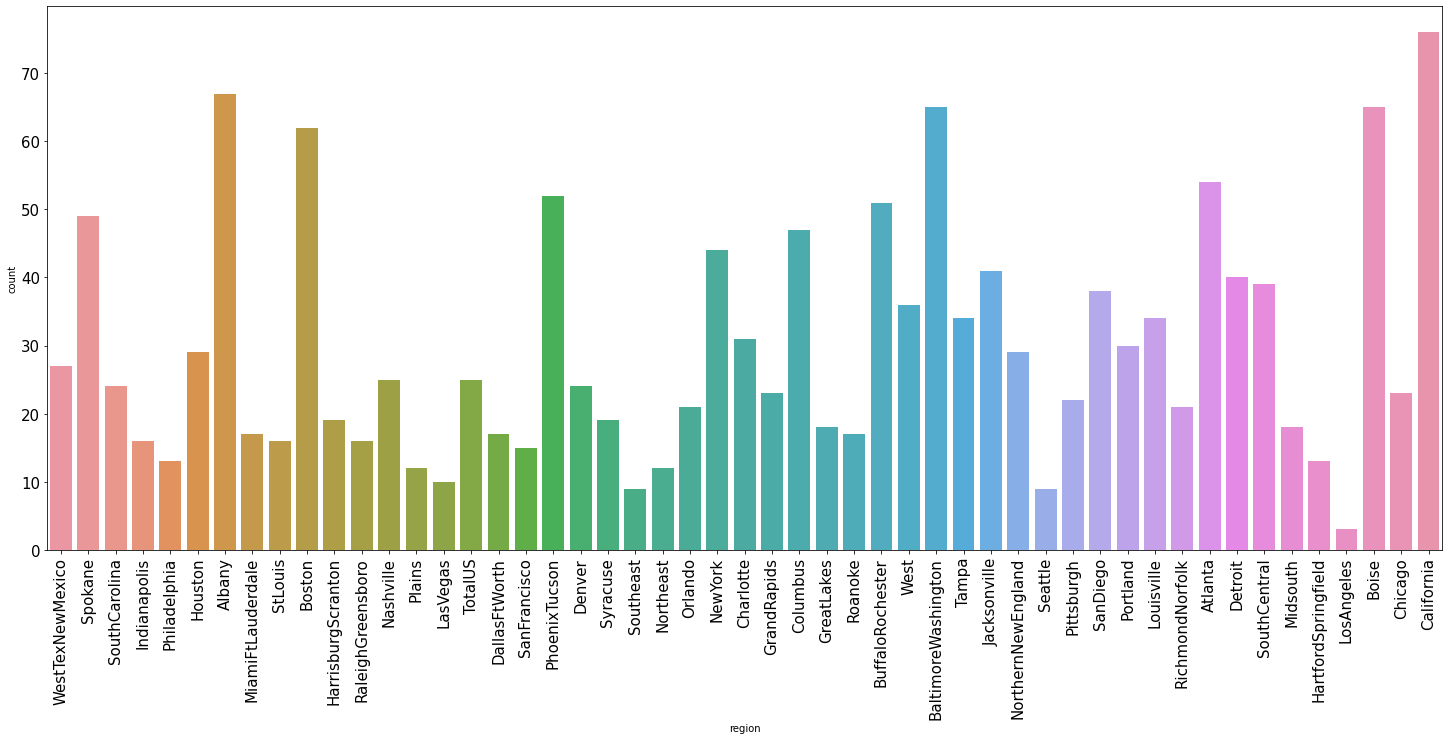

In [15]:
# Bar Chart to indicate the number of regions 
plt.figure(figsize=[25,10])
sns.countplot(x = 'region', data = df)
plt.xticks(rotation = 90,fontsize = 15)
plt.yticks(fontsize = 15)

(array([   0.,  200.,  400.,  600.,  800., 1000., 1200., 1400.]),
 <a list of 8 Text major ticklabel objects>)

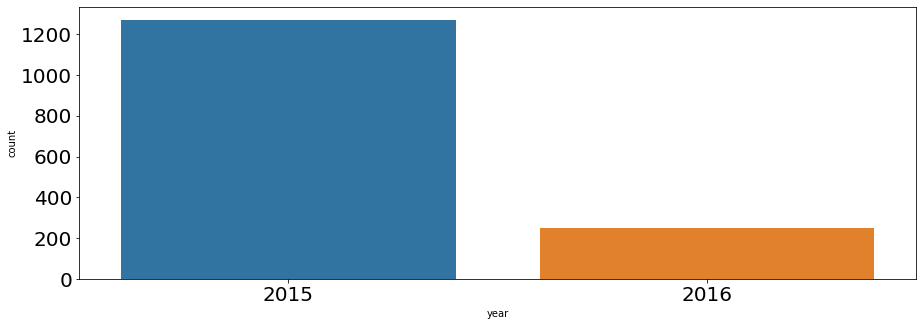

In [16]:
# Bar Chart to indicate the year
plt.figure(figsize=[15,5])
sns.countplot(x = 'year', data = df)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)

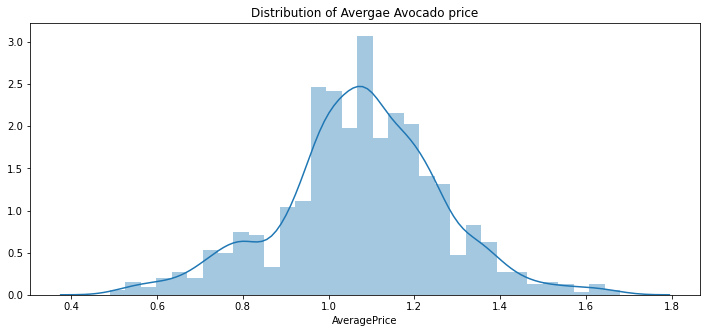

In [17]:
# Distribution of average price
plt.figure(figsize=(12,5))
plt.title("Distribution of Avergae Avocado price")
sns.distplot(df["AveragePrice"])

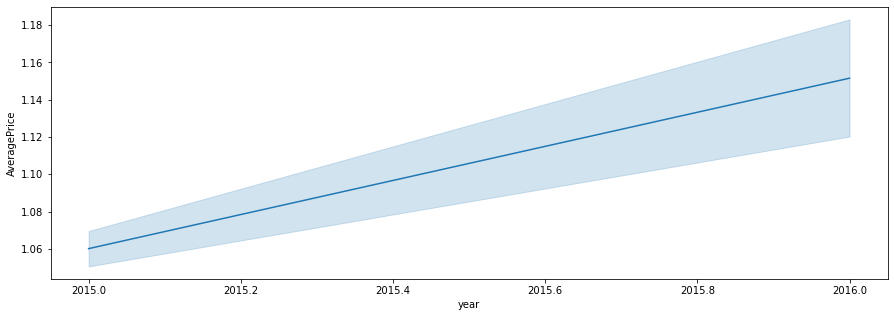

In [18]:
# average price by year
plt.figure(figsize=(15,5))
sns.lineplot(x="year", y="AveragePrice",  data=df)
plt.show()

Text(0.5, 0, 'Month')

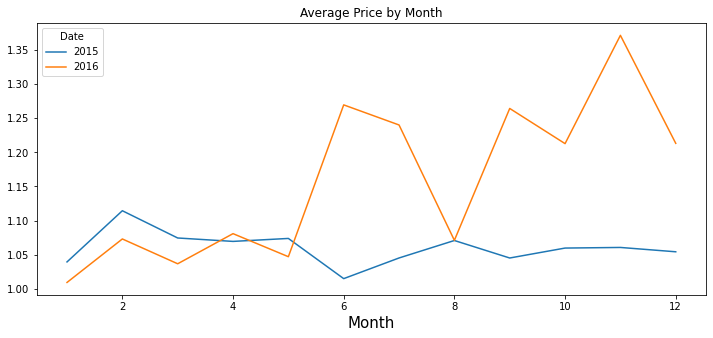

In [19]:
grp = pd.pivot_table(df,index=df['Date'].dt.month,columns=df['Date'].dt.year,values='AveragePrice',aggfunc=np.mean)
grp.plot(figsize=(12,5));
plt.title('Average Price by Month')
plt.xlabel("Month",fontsize=15)

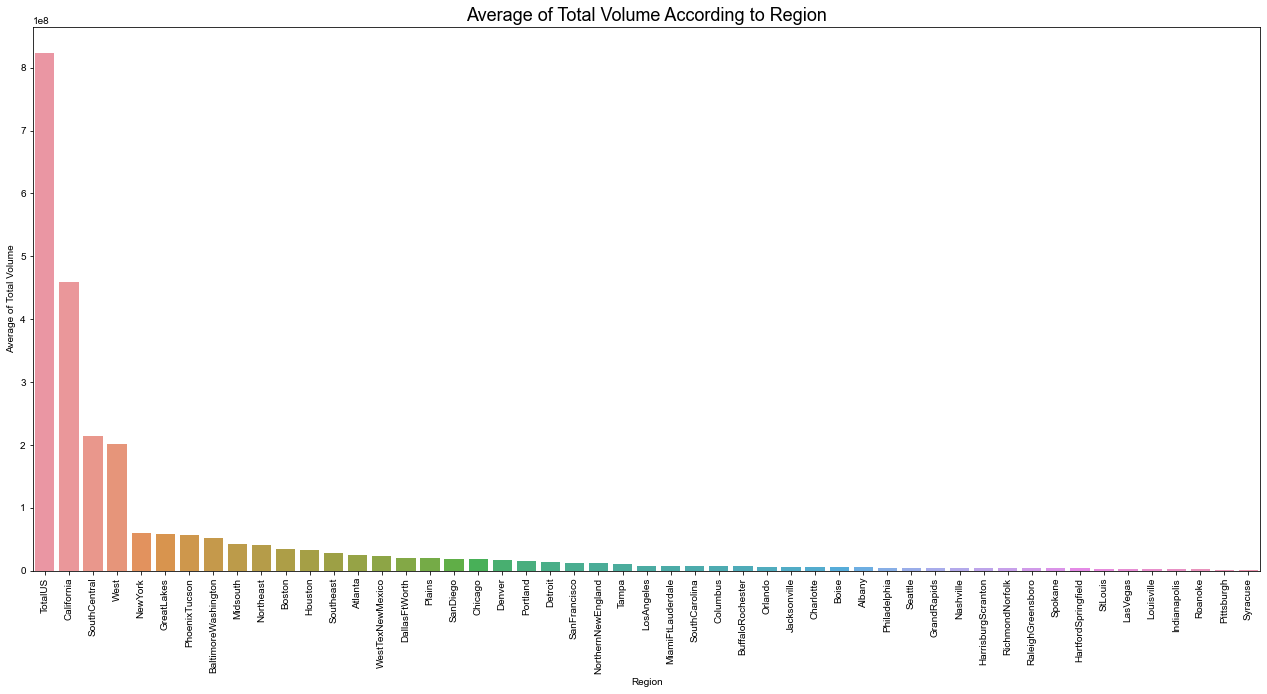

In [20]:
# Top regions by total volume of avocados sold
grp = df.groupby('region').agg({'Total Volume':'sum'}).reset_index()
plt.figure(figsize=(22,10));
sns.barplot(x='region',y='Total Volume',data=grp.sort_values('Total Volume',ascending=False));
sns.set(font_scale=1.5);
plt.xticks(rotation=90);
plt.xlabel('Region');
plt.ylabel('Average of Total Volume');
plt.title('Average of Total Volume According to Region');

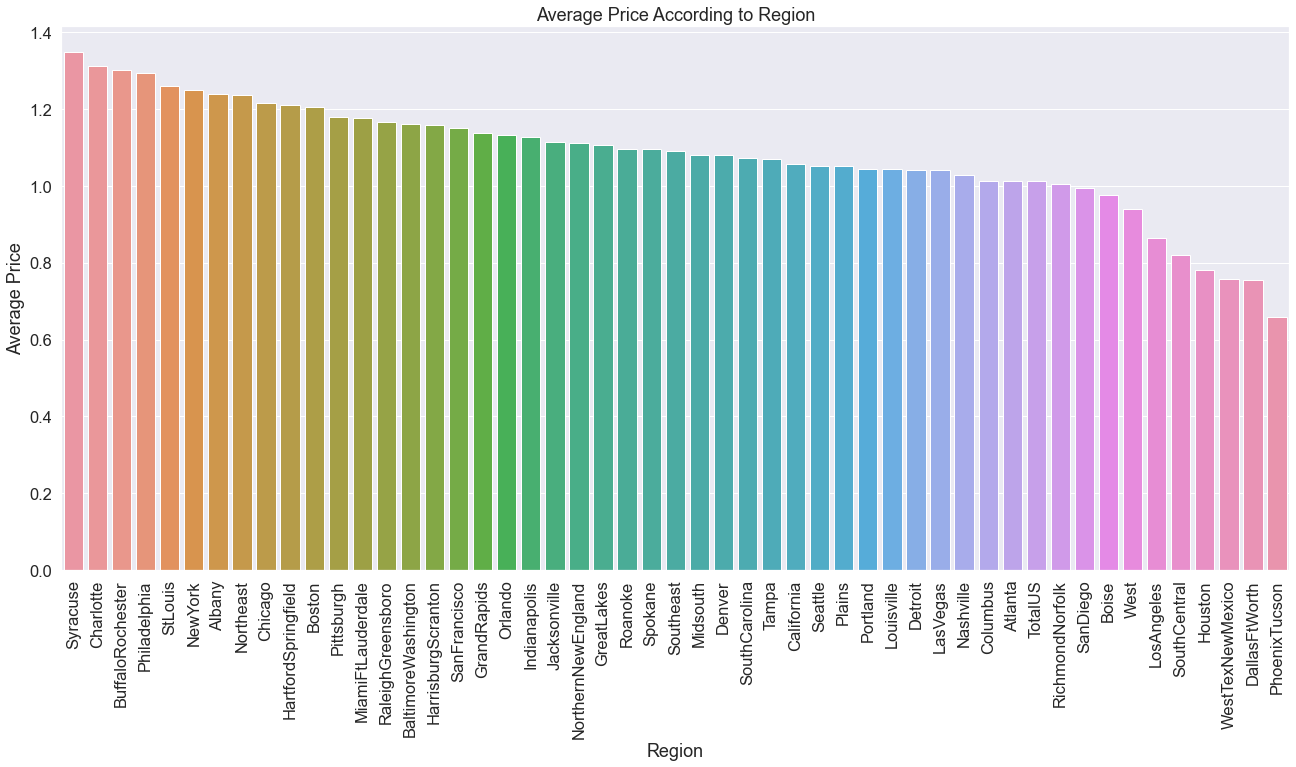

In [21]:
# Top regions by total volume of avocados sold
grp = df.groupby('region').agg({'AveragePrice':'mean'}).reset_index()
plt.figure(figsize=(22,10));
sns.barplot(x='region',y='AveragePrice',data=grp.sort_values('AveragePrice',ascending=False));
sns.set(font_scale=1.5);
plt.xticks(rotation=90);
plt.xlabel('Region');
plt.ylabel('Average Price');
plt.title('Average Price According to Region');

# EDA

In [22]:
df.corr()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
AveragePrice,1.000000,-0.140470,-0.190096,-0.092084,-0.100567,-0.111597,-0.097682,-0.177480,-0.048284,0.178683
Total Volume,-0.140470,1.000000,0.985568,0.987154,0.934347,0.967689,0.960642,0.910226,0.521717,-0.004189
4046,-0.190096,0.985568,1.000000,0.951952,0.898570,0.930395,0.922278,0.884229,0.474063,-0.040439
4225,-0.092084,0.987154,0.951952,1.000000,0.927757,0.951779,0.943988,0.900496,0.504718,-0.007254
4770,-0.100567,0.934347,0.898570,0.927757,1.000000,0.926405,0.923607,0.840523,0.646053,0.029222
Total Bags,-0.111597,0.967689,0.930395,0.951779,0.926405,1.000000,0.997341,0.911336,0.601856,0.090108
Small Bags,-0.097682,0.960642,0.922278,0.943988,0.923607,0.997341,1.000000,0.879131,0.611300,0.106382
Large Bags,-0.177480,0.910226,0.884229,0.900496,0.840523,0.911336,0.879131,1.000000,0.447779,-0.018678
XLarge Bags,-0.048284,0.521717,0.474063,0.504718,0.646053,0.601856,0.611300,0.447779,1.000000,0.218342
year,0.178683,-0.004189,-0.040439,-0.007254,0.029222,0.090108,0.106382,-0.018678,0.218342,1.000000


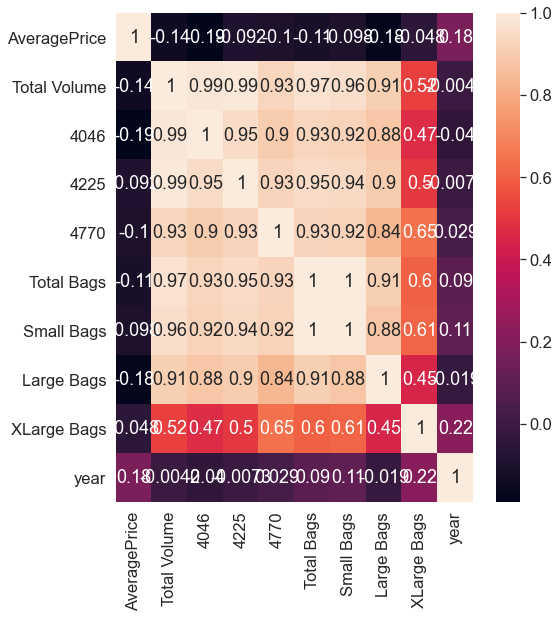

In [23]:
# heatmap correlation
import seaborn as sns
corr_hmap=df.corr()
plt.figure(figsize=(8,9))
sns.heatmap(corr_hmap,annot=True)
plt.show()

In [24]:
#dropping unnecessary columns
df.drop('Date',axis=1,inplace=True)
df.drop('region',axis=1,inplace=True)
df.drop('year',axis=1,inplace=True)

AveragePrice       AxesSubplot(0.125,0.536818;0.0945122x0.343182)
Total Volume    AxesSubplot(0.238415,0.536818;0.0945122x0.343182)
4046            AxesSubplot(0.351829,0.536818;0.0945122x0.343182)
4225            AxesSubplot(0.465244,0.536818;0.0945122x0.343182)
4770            AxesSubplot(0.578659,0.536818;0.0945122x0.343182)
Total Bags      AxesSubplot(0.692073,0.536818;0.0945122x0.343182)
Small Bags      AxesSubplot(0.805488,0.536818;0.0945122x0.343182)
Large Bags            AxesSubplot(0.125,0.125;0.0945122x0.343182)
XLarge Bags        AxesSubplot(0.238415,0.125;0.0945122x0.343182)
dtype: object

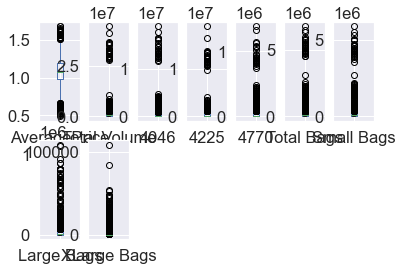

In [25]:
# checking outliers
df.plot.box(subplots=True,layout=(2,7))

In [26]:
# removing outliers

from scipy.stats import zscore

z=np.abs(zscore(df))
print(df.shape)
df=df.loc[(z<3).all(axis=1)]
print(df.shape)

(1517, 9)
(1436, 9)


In [27]:
df.skew()

AveragePrice   -0.184770
Total Volume    2.704085
4046            3.120756
4225            2.367429
4770            3.331191
Total Bags      4.165747
Small Bags      4.410267
Large Bags      3.518056
XLarge Bags     5.118965
dtype: float64

In [28]:
# treating skewness using log

for col in df.columns:
    if df.skew().loc[col]>0.55:
        df[col]=np.log1p(df[col])

In [29]:
df.skew()

AveragePrice   -0.184770
Total Volume    0.462899
4046           -0.270283
4225            0.011359
4770           -0.449713
Total Bags      0.378673
Small Bags      0.420856
Large Bags     -0.979047
XLarge Bags     0.851740
dtype: float64

In [30]:
# treating skewness using log

for col in df.columns:
    if df.skew().loc[col]>0.55:
        df[col]=np.log1p(df[col])

In [31]:
df.skew()

AveragePrice   -0.184770
Total Volume    0.462899
4046           -0.270283
4225            0.011359
4770           -0.449713
Total Bags      0.378673
Small Bags      0.420856
Large Bags     -0.979047
XLarge Bags     0.451310
dtype: float64

In [32]:
# treating skewness using log
df['Large Bags']=np.log1p(df['Large Bags'])


In [33]:
df.skew()

AveragePrice   -0.184770
Total Volume    0.462899
4046           -0.270283
4225            0.011359
4770           -0.449713
Total Bags      0.378673
Small Bags      0.420856
Large Bags     -2.064773
XLarge Bags     0.451310
dtype: float64

# Sending Data to Model for training and testing

In [34]:
#splitting the data for training and test

x=df.drop(columns=['AveragePrice'])
y=df['AveragePrice']

In [35]:
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()
x=scale.fit_transform(x)

In [36]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=42)


In [37]:
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.metrics import r2_score




In [38]:
model=[LinearRegression(),Lasso(),Ridge(),ElasticNet(),SVR(),DecisionTreeRegressor(),KNeighborsRegressor()]

for m in model:
    m.fit(x_train,y_train)
    print("Score of ",m," is",m.score(x_train,y_train))
    predm=m.predict(x_test)
    print("Error:")
    print("Mean Absolute Error:",mean_absolute_error(y_test,predm))
    print("Mean Squared Error:",mean_squared_error(y_test,predm))
    print("Root Mean Squared Error:",np.sqrt(mean_squared_error(y_test,predm)))
    print("R2 Score:",r2_score(y_test,predm))
    print("**************************************************************************************************")
    print('\n')

Score of  LinearRegression()  is 0.38690451090550426
Error:
Mean Absolute Error: 0.11037563039191668
Mean Squared Error: 0.022489407277235154
Root Mean Squared Error: 0.14996468676736918
R2 Score: 0.36904583976395977
**************************************************************************************************


Score of  Lasso()  is 0.0
Error:
Mean Absolute Error: 0.13931027390631046
Mean Squared Error: 0.03571032240503776
Root Mean Squared Error: 0.18897175028304564
R2 Score: -0.0018750697639053904
**************************************************************************************************


Score of  Ridge()  is 0.3868224071789621
Error:
Mean Absolute Error: 0.11025111812462683
Mean Squared Error: 0.02246793949128754
Root Mean Squared Error: 0.14989309354098854
R2 Score: 0.3696481317091288
**************************************************************************************************


Score of  ElasticNet()  is 0.0
Error:
Mean Absolute Error: 0.13931027390631046
Mean S

In [39]:
# so from above the best model is Kneighbor now we will find best parameters using GrisSearchCV

from sklearn.model_selection import GridSearchCV
knr=KNeighborsRegressor()
neighbors={'n_neighbors':range(1,30)}
clf=GridSearchCV(knr,estimator)
clf.fit(x,y)
clf.best_params_




{'n_neighbors': 4}

In [40]:
# using kneighbors with best result
knr=KNeighborsRegressor(n_neighbors=4)
knr.fit(x_train,y_train)
print("Score is ",knr.score(x_train,y_train))
predknr=knr.predict(x_test)
print('\n')
print("Mean Absolute Error:",mean_absolute_error(y_test,predknr))
print("Mean Squared Error:",mean_squared_error(y_test,predknr))
print("Root Mean Squared Error:",np.sqrt(mean_squared_error(y_test,predknr)))
print("R2 Score:",r2_score(y_test,predknr))


Score is  0.8667212791508799


Mean Absolute Error: 0.06686631944444445
Mean Squared Error: 0.009593424479166666
Root Mean Squared Error: 0.09794602839914779
R2 Score: 0.730850572830898


In [41]:
#cross validation
from sklearn.model_selection import cross_val_score

knrscores=cross_val_score(knr,x,y,cv=5)
print(knrscores)
print(knrscores.mean(),knrscores.std())

[0.77372189 0.74988567 0.75034324 0.70011211 0.28284575]
0.6513817314892705 0.18582622985036418


# Using some Ensemble Techniques to boost the score

In [42]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor


In [43]:
svr=SVR()
model=[RandomForestRegressor(),AdaBoostRegressor(),AdaBoostRegressor(base_estimator=svr),GradientBoostingRegressor()]

for m in model:
    m.fit(x_train,y_train)
    print("Score of ",m," is",m.score(x_train,y_train))
    predm=m.predict(x_test)
    print("Error:")
    print("Mean Absolute Error:",mean_absolute_error(y_test,predm))
    print("Mean Squared Error:",mean_squared_error(y_test,predm))
    print("Root Mean Squared Error:",np.sqrt(mean_squared_error(y_test,predm)))
    print("R2 Score:",r2_score(y_test,predm))
    print("**************************************************************************************************")
    print('\n')

Score of  RandomForestRegressor()  is 0.9719080868943181
Error:
Mean Absolute Error: 0.062087499999999976
Mean Squared Error: 0.008486986666666661
Root Mean Squared Error: 0.09212484283116396
R2 Score: 0.761892366517742
**************************************************************************************************


Score of  AdaBoostRegressor()  is 0.593606324693624
Error:
Mean Absolute Error: 0.10606495432294688
Mean Squared Error: 0.017927404549683765
Root Mean Squared Error: 0.13389325804417399
R2 Score: 0.4970356335576974
**************************************************************************************************


Score of  AdaBoostRegressor(base_estimator=SVR())  is 0.8018118830543838
Error:
Mean Absolute Error: 0.07942157133587616
Mean Squared Error: 0.009934113402226143
Root Mean Squared Error: 0.09967002258566085
R2 Score: 0.7212923354482568
**************************************************************************************************


Score of  GradientBoosting

# GridsearchCV

In [44]:
# so from above the best model is random forest regressor now we will find best parameters using GrisSearchCV

from sklearn.model_selection import GridSearchCV
rfr=RandomForestRegressor()
estimator={'n_estimators':[50,100,150]}
clf=GridSearchCV(rfr,estimator)
clf.fit(x,y)
clf.best_params_

{'n_estimators': 150}

# Best Model

In [45]:
# random forest has more better result than knr model
rfr=RandomForestRegressor(n_estimators=150)
rfr.fit(x_train,y_train)
print("Score is ",rfr.score(x_train,y_train))
predrfr=rfr.predict(x_test)
print('\n')
print("Mean Absolute Error:",mean_absolute_error(y_test,predrfr))
print("Mean Squared Error:",mean_squared_error(y_test,predrfr))
print("Root Mean Squared Error:",np.sqrt(mean_squared_error(y_test,predrfr)))
print("R2 Score:",r2_score(y_test,predrfr))

Score is  0.97308839466363


Mean Absolute Error: 0.062268055555555514
Mean Squared Error: 0.008618133086419757
Root Mean Squared Error: 0.0928339005235682
R2 Score: 0.7582129730093574


# Cross Validation

In [46]:
# cross validation
from sklearn.model_selection import cross_val_score

rfrscores=cross_val_score(rfr,x,y,cv=5)
print(rfrscores)
print(rfrscores.mean(),rfrscores.std())

[0.80223313 0.80064586 0.81458136 0.73740931 0.2585945 ]
0.6826928320903176 0.21375250730454376


# Plot between Test and Predicted Data

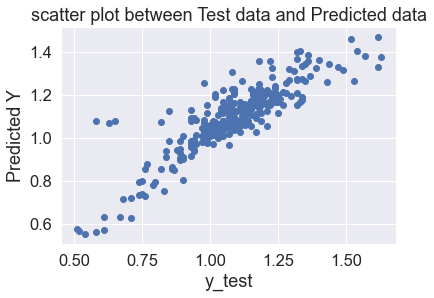

In [47]:
# Scatter plot between Test and Predicted Data
plt.scatter(y_test,predrfr)
plt.xlabel('y_test')
plt.ylabel('Predicted Y')
plt.title("scatter plot between Test data and Predicted data")
plt.show()

# Saving the best Model

In [48]:
#so best result is of knr....saving that model

import joblib
joblib.dump(rfr,'rfrfile_avocado_project.obj')



['rfrfile_avocado_project.obj']